Upload data to sqlite tables.

In [1]:
import pandas as pd
import numpy as np
from IPython import display as dis
import scipy.io.wavfile as wav
import tensorflow as tf
from tensorflow.contrib.legacy_seq2seq.python.ops.seq2seq import basic_rnn_seq2seq
from tensorflow.contrib.rnn import RNNCell, LSTMCell, MultiRNNCell
from scipy import signal 
from librosa import core
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import time

%matplotlib inline

In [2]:
x_y = pd.read_pickle("dataset/x_y.pkl")
x_y = x_y.sample(frac=1)

In [3]:
time_step = 1000
hidden_layers = 1
batch_size = 1000
feature_count = 1
latent_dim = 61 
rate=8000
window_size=time_step

In [4]:

x_y

,sigs,emotion
file_name,,
Ses01F_script01_3_F012,"[[-0.00843145], [-0.0103935], [-0.0168974], [-...",Happiness
Ses01F_script01_1_F007,"[[0.00187134], [0.00314571], [0.00163029], [0....",Surprise
Ses01F_script01_3_M023,"[[-0.0016493], [-0.00471546], [-0.00524028], [...",Sadness
Ses01F_script01_3_M019,"[[0.00908282], [0.00283858], [0.000783122], [0...",Excited
Ses01F_script01_3_F020,"[[-0.00100825], [0.000186709], [-0.00142541], ...",Excited
Ses01F_script01_1_F015,"[[0.000371887], [-0.000195927], [-0.000105274]...",Neutral state
Ses01F_script01_1_F006,"[[0.00285482], [0.00479193], [0.00386586], [0....",Neutral state
Ses01F_script01_3_M006,"[[-0.000596065], [0.00199818], [0.00219676], [...",Surprise
Ses01F_script01_3_F013,"[[-0.0302205], [-0.0307595], [-0.00110702], [0...",Happiness


In [5]:
le = LabelEncoder()
x_y.emotion = le.fit_transform(x_y.emotion)
x_y

,sigs,emotion
file_name,,
Ses01F_script01_3_F012,"[[-0.00843145], [-0.0103935], [-0.0168974], [-...",3
Ses01F_script01_1_F007,"[[0.00187134], [0.00314571], [0.00163029], [0....",6
Ses01F_script01_3_M023,"[[-0.0016493], [-0.00471546], [-0.00524028], [...",5
Ses01F_script01_3_M019,"[[0.00908282], [0.00283858], [0.000783122], [0...",1
Ses01F_script01_3_F020,"[[-0.00100825], [0.000186709], [-0.00142541], ...",1
Ses01F_script01_1_F015,"[[0.000371887], [-0.000195927], [-0.000105274]...",4
Ses01F_script01_1_F006,"[[0.00285482], [0.00479193], [0.00386586], [0....",4
Ses01F_script01_3_M006,"[[-0.000596065], [0.00199818], [0.00219676], [...",6
Ses01F_script01_3_F013,"[[-0.0302205], [-0.0307595], [-0.00110702], [0...",3


In [6]:
dis.Audio(data = x_y.iloc[-1,:].sigs.ravel(), rate = rate )

Signal [ 0.00331028  0.00125877  0.00034469 ...,  0.00145573  0.00185822  0.        ]


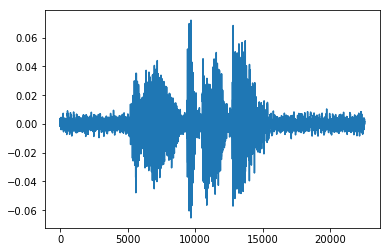

In [7]:
print("Signal",x_y.iloc[-1,:].sigs.ravel())
plt.plot(x_y.iloc[-1,:].sigs.ravel())

In [8]:
#x_y.loc[:,"sequence_length"] = None
#x_y.loc[:,"max"] = None

#time_step = max([sig.shape[0] for sig in x_y.sigs ])
print(time_step)

1000


In [9]:
#for index, row in x_y.iterrows():
#    sig = row.sigs
#    row.sequence_length = sig.shape[0]
#    row.max = max(abs(sig))
#    sig = sig / row.max
#    sig = np.concatenate((sig, np.zeros((time_step - row.sequence_length,1))))
#    #sig = np.pad(sig, (0, time_step - row.sequence_length), mode = "constant")
#    sig = np.reshape(sig, (1,-1, 1)) 
#    row.sigs = sig 

In [10]:
for index, row in x_y.iterrows():
    sig = row.sigs.ravel()
    sig = np.resize(sig, (len(sig) - len(sig)%window_size,))
    sig = sig.reshape((-1, window_size))
    x_y.loc[index,'sigs'] = [sig]
    


In [11]:
x_y.loc[:,'file_num'] = np.arange(0,x_y.shape[0], 1)
x_y

,sigs,emotion,file_num
file_name,,,
Ses01F_script01_3_F012,"[[[-0.00843145, -0.0103935, -0.0168974, -0.016...",3,0
Ses01F_script01_1_F007,"[[[0.00187134, 0.00314571, 0.00163029, 0.00189...",6,1
Ses01F_script01_3_M023,"[[[-0.0016493, -0.00471546, -0.00524028, -0.00...",5,2
Ses01F_script01_3_M019,"[[[0.00908282, 0.00283858, 0.000783122, 0.0055...",1,3
Ses01F_script01_3_F020,"[[[-0.00100825, 0.000186709, -0.00142541, 0.00...",1,4
Ses01F_script01_1_F015,"[[[0.000371887, -0.000195927, -0.000105274, -0...",4,5
Ses01F_script01_1_F006,"[[[0.00285482, 0.00479193, 0.00386586, 0.00423...",4,6
Ses01F_script01_3_M006,"[[[-0.000596065, 0.00199818, 0.00219676, 0.000...",6,7
Ses01F_script01_3_F013,"[[[-0.0302205, -0.0307595, -0.00110702, 0.0133...",3,8


In [12]:
sigs = None

for index, row in x_y.iterrows():
    sig = row.sigs[0]
    #print(sig.shape)
    file_num = row.file_num
    file_num = np.repeat(file_num, sig.shape[0]).reshape(-1,1)
    emotion = np.repeat(row.emotion, sig.shape[0]).reshape(-1,1)
    seq = np.arange(0,sig.shape[0],1).reshape(-1,1)
    
    sig = np.concatenate((sig, emotion, file_num, seq), axis = 1)
    #print(sig[:,-2:].shape)
    if(sigs is None):
        sigs = sig
    else:
        sigs = np.concatenate((sigs, sig))
    #print(sigs.shape)
np.random.shuffle(sigs)
print(sigs.shape)
print("Signal",sigs[-1], "Rate", rate, "Max time step:", time_step)


(1823, 1003)
Signal [ -2.20099706e-02  -1.52845616e-02  -1.03990575e-02 ...,   2.00000000e+00
   3.50000000e+01   5.20000000e+01] Rate 8000 Max time step: 1000


In [13]:
class Data(object):
    x = sigs[:,:-3][...,np.newaxis] #+ np.random.normal(scale=0.01, size = sigs.shape)
    y_ = sigs[:,:-3][...,np.newaxis]
    f = sigs[:,-2]
    s = sigs[:,-1]
    e = sigs[:,-3]
    #shift
    y_ = y_[:,1:] #np.roll(y_, 1, axis = 1)[1:,:]
    x = x[:,:-1]
    print(x.shape)
    print(y_.shape)
    

(1823, 999, 1)
(1823, 999, 1)


In [14]:
print("Signal",Data.x[-1], "Shape", Data.x.shape, "Rate", rate, "Max time step:", time_step)

Signal [[ -2.20099706e-02]
 [ -1.52845616e-02]
 [ -1.03990575e-02]
 [ -4.64682002e-03]
 [  1.14053953e-03]
 [  6.17806334e-03]
 [  1.17126694e-02]
 [  1.33045651e-02]
 [  7.89854582e-03]
 [ -2.82340357e-03]
 [ -1.31525192e-02]
 [ -1.67023204e-02]
 [ -1.10290945e-02]
 [  7.56826776e-04]
 [  6.26059435e-03]
 [  1.10076964e-02]
 [  5.80538390e-03]
 [  9.52781178e-04]
 [ -1.49167911e-03]
 [ -4.74572834e-03]
 [ -3.42981447e-03]
 [ -2.12070096e-04]
 [  2.81086448e-03]
 [ -2.15861437e-04]
 [  5.26634452e-04]
 [  3.78726120e-03]
 [  1.33716101e-02]
 [  1.89090520e-02]
 [  1.37764551e-02]
 [  4.60752472e-03]
 [ -3.77268624e-03]
 [ -4.99571674e-03]
 [ -3.78709566e-03]
 [ -9.05940123e-03]
 [ -9.98189766e-03]
 [ -2.26473389e-03]
 [  2.11925479e-04]
 [  3.35341366e-03]
 [  1.79721450e-03]
 [ -3.37244873e-03]
 [ -8.46282113e-03]
 [ -1.40155796e-02]
 [ -1.18262349e-02]
 [ -5.16042067e-03]
 [ -9.55249183e-04]
 [ -6.05717069e-03]
 [ -1.16270147e-02]
 [ -1.98564716e-02]
 [ -1.96051486e-02]
 [ -1.1109835

In [15]:
print(Data.e,Data.e.shape)

[ 2.  4.  2. ...,  2.  3.  2.] (1823,)


In [16]:
#["batch_size", "steps", "step_size", "feature_count"]
[batch_size, time_step, feature_count ]

[1000, 1000, 1]

In [17]:
class network(object):
    
    def __init__(self):
        pass
            
    def build_layers(self):
        
        tf.reset_default_graph()
        #learning_rate = tf.Variable(initial_value=0.001)

        global time_step 
        global batch_size 
        global hidden_layers
        global step_size
        global latent_dim
        
        with tf.variable_scope("Input"):
            self.x = tf.placeholder("float32", shape=[batch_size, time_step-1, feature_count], name='x')
            self.y_ = tf.placeholder("float32", shape=[batch_size, time_step-1, feature_count], name='y')
            self.e_ = tf.placeholder(tf.int32, shape=[batch_size], name='e')
            
            self.keep_prob = tf.placeholder("float", name='kp')
            self.lr = tf.placeholder("float", name='lr')
            
        with tf.variable_scope("encoder"):
            enc_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            #enc_lstm = MultiRNNCell([tf.contrib.rnn.LSTMCell(latent_dim) for i in range(3)] )
            
            self.state = enc_lstm.zero_state(batch_size, "float")
            print("State:",self.state)
            
            print("Audio Input:", self.x)
            self.enc_output, self.state = tf.nn.dynamic_rnn(enc_lstm, self.x, initial_state = self.state, 
                                                             parallel_iterations = 4)
            self.enc_state = self.state
            print("Encoder Output:",self.enc_output)

        with tf.variable_scope("decoder"):
            dec_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            #dec_lstm = MultiRNNCell([tf.contrib.rnn.LSTMCell(latent_dim) for i in range(3)] )
            self.dec_output, self.state = tf.nn.dynamic_rnn(dec_lstm, self.enc_output, initial_state = self.state, 
                                                             parallel_iterations = 4)
            
            self.dec_output = tf.layers.dense(self.dec_output, units = latent_dim, kernel_regularizer=tf.nn.l2_loss)
            self.output = tf.layers.dense(self.dec_output, units = 1)
            print("Decoder Output:",self.dec_output)
        
        with tf.variable_scope("target"):
            self.hidden_layer = tf.layers.dense(self.enc_state.c, units = latent_dim, kernel_regularizer=tf.nn.l2_loss)
            self.hidden_layer = tf.layers.dense(self.hidden_layer, units = latent_dim, kernel_regularizer=tf.nn.l2_loss)
            self.hidden_layer = tf.layers.dense(self.hidden_layer, units = 40, kernel_regularizer=tf.nn.l2_loss)
            print(self.hidden_layer)
            self.e = tf.layers.dense(self.hidden_layer, units = 7)
        
        with tf.variable_scope("Optimize"):
            #loss = tf.contrib.seq2seq.sequence_loss(self.output, self.x, tf.ones(shape=[batch_size, time_step]))
            #self.loss = tf.reduce_sum(tf.abs(self.y_)) - tf.reduce_sum(tf.abs(self.output))
            
            #self.y__norm = tf.square(self.y_)
            #self.output_norm = tf.square(self.output) 
            self.loss = tf.losses.mean_squared_error(self.y_, self.output)
            #self.loss = tf.losses.huber_loss(self.y_, self.output)
            
            label_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = self.e_, logits = self.e))
            self.loss = self.loss + label_loss
            optimizer = tf.train.AdamOptimizer(self.lr)
            self.opti_op = optimizer.minimize(self.loss)
            self.pred = tf.argmax(self.e, 1)
            
        print("Final Output:", self.output)

            
        

In [18]:
import collections

y_pred_list = []
final_state = None
Data.loss=[]

class Train:    
    
    def train(net, epochs, lrs, x, y, f, e, s):
        global final_state
        
        with tf.Session() as sess:
            
            sess.run(tf.global_variables_initializer())
            for lr in lrs:
                for epoch in range(1, epochs+1):
                    Data.out = pd.DataFrame(columns=['file_num', 'seq','x_out', 'y_out', "y_orig_out", 'emotion'])

                    Data.hidden_layer = []
                    Data.pred = []
                    
                    for i in range(0,x.shape[0],batch_size):
                        x_train = x[i:i+batch_size,...]
                        y_train = y[i:i+batch_size,...]
                        f_train = f[i:i+batch_size]
                        e_train = e[i:i+batch_size]
                        s_train = s[i:i+batch_size]
                        if x_train.shape[0] < batch_size:
                            break;
                        _, state, x_out, y_orig_out, y_out, loss, pred, hidden_layer = sess.run(
                                                [net.opti_op, net.enc_state, 
                                                 net.x, net.y_, 
                                                 net.output, net.loss, net.pred,
                                                 net.hidden_layer], #net.summary_op
                                                  feed_dict={net.x: x_train, 
                                                             net.y_: y_train,
                                                             net.e_:e_train,
                                                             net.keep_prob:1,
                                                             net.lr:lr})
                        print("Step {} lr {} Loss {}".format(epoch, lr, loss))
                        
                        Data.loss.append(loss)
                        
                        for f_n, s_n, x_o, y_o, y_o_o, e_o, h_o in zip(f_train, s_train, x_out, y_out, y_orig_out, e_train, hidden_layer):
                            t = pd.DataFrame({"file_num":f_n, "seq":s_n, "emotion":e_o,
                            "x_out":[x_o.ravel()],
                            "y_out":[y_o.ravel()],
                            "y_orig_out":[y_o_o.ravel()],
                            "hidden":[h_o]})
                            Data.out = Data.out.append(t)
                        #Data.hidden_layer.append(hidden_layer)
                        Data.pred.append(pred)

In [19]:
import itertools

class Hyperparameters:
    def start_training():
        
        epochs = 100
        lrs = [1e-4, 1e-10]
        n = network()
        n.build_layers()
        
        Train.train(n, epochs, lrs, Data.x, Data.y_, Data.f, Data.e, Data.s)
            

In [20]:
Hyperparameters.start_training()

State: LSTMStateTuple(c=<tf.Tensor 'encoder/LSTMCellZeroState/zeros:0' shape=(1000, 61) dtype=float32>, h=<tf.Tensor 'encoder/LSTMCellZeroState/zeros_1:0' shape=(1000, 61) dtype=float32>)
Audio Input: Tensor("Input/x:0", shape=(1000, 999, 1), dtype=float32)
Encoder Output: Tensor("encoder/rnn/transpose:0", shape=(1000, 999, 61), dtype=float32)
Decoder Output: Tensor("decoder/dense/BiasAdd:0", shape=(1000, 999, 61), dtype=float32)
Tensor("target/dense_3/BiasAdd:0", shape=(1000, 40), dtype=float32)
Final Output: Tensor("decoder/dense_2/BiasAdd:0", shape=(1000, 999, 1), dtype=float32)
Step 1 lr 0.0001 Loss 1.9534839391708374
Step 2 lr 0.0001 Loss 1.952767252922058
Step 3 lr 0.0001 Loss 1.9520431756973267
Step 4 lr 0.0001 Loss 1.9513206481933594
Step 5 lr 0.0001 Loss 1.950589895248413
Step 6 lr 0.0001 Loss 1.9498486518859863
Step 7 lr 0.0001 Loss 1.949097752571106
Step 8 lr 0.0001 Loss 1.9483355283737183
Step 9 lr 0.0001 Loss 1.94756019115448
Step 10 lr 0.0001 Loss 1.946769118309021
Step 1

Step 86 lr 1e-10 Loss 1.8893922567367554
Step 87 lr 1e-10 Loss 1.8893922567367554
Step 88 lr 1e-10 Loss 1.8893922567367554
Step 89 lr 1e-10 Loss 1.8893922567367554
Step 90 lr 1e-10 Loss 1.8893922567367554
Step 91 lr 1e-10 Loss 1.8893922567367554
Step 92 lr 1e-10 Loss 1.8893922567367554
Step 93 lr 1e-10 Loss 1.8893922567367554
Step 94 lr 1e-10 Loss 1.8893922567367554
Step 95 lr 1e-10 Loss 1.8893922567367554
Step 96 lr 1e-10 Loss 1.8893922567367554
Step 97 lr 1e-10 Loss 1.8893922567367554
Step 98 lr 1e-10 Loss 1.8893922567367554
Step 99 lr 1e-10 Loss 1.8893922567367554
Step 100 lr 1e-10 Loss 1.8893922567367554


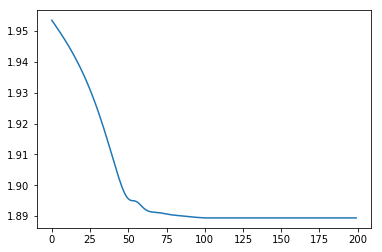

In [21]:
plt.plot(np.array(Data.loss))

In [22]:
#Data.output = np.array(Data.output)
#Data.hidden_layer = np.concatenate(Data.hidden_layer)
Data.pred = np.concatenate(Data.pred)

In [23]:
display("Accuracy", np.mean(np.equal(Data.pred, Data.e[:Data.pred.shape[0]])))

'Accuracy'

0.23899999999999999

In [24]:
Data.out.set_index(keys=['file_num', 'seq'], inplace=True)
Data.out

,,emotion,hidden,x_out,y_orig_out,y_out
file_num,seq,,,,,
39.0,33.0,2.0,"[-0.0586947, 0.124542, 0.0864551, 0.10207, 0.1...","[0.0129648, -0.251536, -0.239756, -0.0996433, ...","[-0.251536, -0.239756, -0.0996433, 0.130873, 0...","[0.0441448, 0.0344618, 0.0321595, 0.0373162, 0..."
46.0,22.0,4.0,"[-0.0513743, 0.125549, 0.0725532, 0.1064, 0.15...","[0.00100263, 0.0039448, 0.0055826, 0.00570818,...","[0.0039448, 0.0055826, 0.00570818, 0.00651649,...","[0.0386435, 0.0264227, 0.0169636, 0.00986169, ..."
39.0,38.0,2.0,"[-0.0501744, 0.125983, 0.0711555, 0.10754, 0.1...","[0.0819329, 0.0558646, 0.0391082, 0.0326468, 0...","[0.0558646, 0.0391082, 0.0326468, 0.0229076, 0...","[0.0385985, 0.0242958, 0.0114128, 4.54441e-05,..."
46.0,12.0,4.0,"[-0.0517053, 0.125367, 0.0725677, 0.106173, 0....","[0.000618453, -2.28532e-05, -0.000510424, -0.0...","[-2.28532e-05, -0.000510424, -0.000307424, 0.0...","[0.0368494, 0.0246063, 0.0152875, 0.00851285, ..."
0.0,11.0,3.0,"[-0.0529645, 0.125729, 0.0716316, 0.105869, 0....","[-0.00737536, -0.00594571, -0.00685125, -0.006...","[-0.00594571, -0.00685125, -0.00694316, -0.005...","[0.0348094, 0.0228095, 0.0139031, 0.00771324, ..."
40.0,30.0,4.0,"[-0.0519255, 0.125383, 0.0726821, 0.106003, 0....","[0.00590455, 0.00737854, 0.00339397, 0.0059209...","[0.00737854, 0.00339397, 0.0059209, -0.0001828...","[0.0372242, 0.0249081, 0.0153287, 0.00814222, ..."
30.0,13.0,3.0,"[-0.0513904, 0.125582, 0.0725396, 0.106424, 0....","[-0.00493984, -0.00393797, -0.00544737, -0.006...","[-0.00393797, -0.00544737, -0.00656229, -0.005...","[0.0388609, 0.0267954, 0.0176888, 0.0112014, 0..."
22.0,18.0,6.0,"[-0.0520552, 0.125264, 0.0729764, 0.105841, 0....","[0.00430544, 0.00493788, 0.00471076, 0.0052198...","[0.00493788, 0.00471076, 0.00521987, 0.0047504...","[0.0369462, 0.0246906, 0.0152223, 0.00814616, ..."
28.0,7.0,0.0,"[-0.0835975, 0.11891, 0.0987456, 0.0858398, 0....","[0.874429, 0.816768, 0.899139, 0.827194, 0.561...","[0.816768, 0.899139, 0.827194, 0.561696, 0.411...","[-0.00563826, -0.034769, -0.0805542, -0.14465,..."


In [25]:
Data.out.x_out[0.0].sort_index()

seq
0.0     [-0.00843145, -0.0103935, -0.0168974, -0.01676...
1.0     [0.00617578, 0.00743864, 0.0096863, 0.0108755,...
3.0     [-0.00228611, 0.0012954, -0.000840448, -0.0011...
5.0     [0.158009, 0.0314317, -0.202731, -0.31187, -0....
10.0    [-0.017941, 0.00668942, 0.00774728, -0.014002,...
11.0    [-0.00737536, -0.00594571, -0.00685125, -0.006...
13.0    [0.0117626, 0.0231779, 0.0120417, -0.000247818...
14.0    [-0.00272855, -0.00145884, 4.99254e-05, -0.003...
16.0    [-0.0329525, -0.000129222, 0.0200779, -0.02021...
19.0    [-0.0147699, -0.014771, -0.0204354, -0.0245636...
21.0    [0.0164862, 0.0144265, 0.0112288, 0.00489468, ...
22.0    [0.00833527, 0.0143842, 0.00146627, -0.0054396...
23.0    [-0.00498991, -0.00144114, 0.00615791, 0.00592...
24.0    [-0.00958515, -0.00832592, -0.0060221, -0.0023...
28.0    [-0.023066, -0.0181041, -0.0166825, -0.0220806...
29.0    [-0.0108885, -0.00752419, -0.00467929, 0.00039...
30.0    [-0.00427953, -0.00643691, -0.00606674, -0.002...
31.0    [-

In [26]:
np.concatenate(Data.out.x_out[0.0].sort_index().values).shape    

(21978,)

In [27]:
np.concatenate(Data.out.y_out[0.0].sort_index().values).shape    

(21978,)

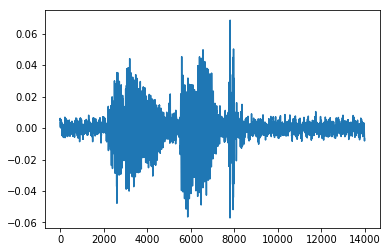

In [28]:
y = np.concatenate(Data.out.x_out[48].sort_index().values)
plt.plot(y)

dis.Audio(data = y, rate = rate)

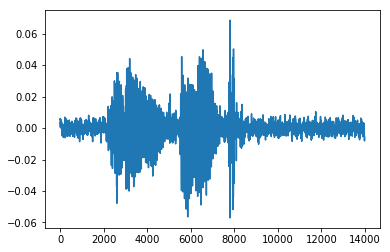

In [29]:
y = np.concatenate(Data.out.y_orig_out[48].sort_index().values)
plt.plot(y)

dis.Audio(data = y, rate = rate)

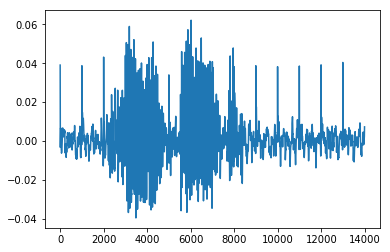

In [30]:
y = np.concatenate(Data.out.y_out[48].sort_index().values)
plt.plot(y)

dis.Audio(data = y, rate = rate)

In [31]:
#Data.out.loc[:,'hidden_layer'] = None

#for c, (index, row) in enumerate(x_y.iterrows()):
#    Data.out.loc[index,"hidden_layer"] = Data.hidden_layer[c].reshape((-1,1))
    
Data.out.loc[:,'emotion'] = le.inverse_transform(Data.out.emotion.values.astype("int"))
Data.out.to_pickle("dataset/x_y_sample_network_targetted_learned.pkl")
Data.out

,,emotion,hidden,x_out,y_orig_out,y_out
file_num,seq,,,,,
39.0,33.0,Frustration,"[-0.0586947, 0.124542, 0.0864551, 0.10207, 0.1...","[0.0129648, -0.251536, -0.239756, -0.0996433, ...","[-0.251536, -0.239756, -0.0996433, 0.130873, 0...","[0.0441448, 0.0344618, 0.0321595, 0.0373162, 0..."
46.0,22.0,Neutral state,"[-0.0513743, 0.125549, 0.0725532, 0.1064, 0.15...","[0.00100263, 0.0039448, 0.0055826, 0.00570818,...","[0.0039448, 0.0055826, 0.00570818, 0.00651649,...","[0.0386435, 0.0264227, 0.0169636, 0.00986169, ..."
39.0,38.0,Frustration,"[-0.0501744, 0.125983, 0.0711555, 0.10754, 0.1...","[0.0819329, 0.0558646, 0.0391082, 0.0326468, 0...","[0.0558646, 0.0391082, 0.0326468, 0.0229076, 0...","[0.0385985, 0.0242958, 0.0114128, 4.54441e-05,..."
46.0,12.0,Neutral state,"[-0.0517053, 0.125367, 0.0725677, 0.106173, 0....","[0.000618453, -2.28532e-05, -0.000510424, -0.0...","[-2.28532e-05, -0.000510424, -0.000307424, 0.0...","[0.0368494, 0.0246063, 0.0152875, 0.00851285, ..."
0.0,11.0,Happiness,"[-0.0529645, 0.125729, 0.0716316, 0.105869, 0....","[-0.00737536, -0.00594571, -0.00685125, -0.006...","[-0.00594571, -0.00685125, -0.00694316, -0.005...","[0.0348094, 0.0228095, 0.0139031, 0.00771324, ..."
40.0,30.0,Neutral state,"[-0.0519255, 0.125383, 0.0726821, 0.106003, 0....","[0.00590455, 0.00737854, 0.00339397, 0.0059209...","[0.00737854, 0.00339397, 0.0059209, -0.0001828...","[0.0372242, 0.0249081, 0.0153287, 0.00814222, ..."
30.0,13.0,Happiness,"[-0.0513904, 0.125582, 0.0725396, 0.106424, 0....","[-0.00493984, -0.00393797, -0.00544737, -0.006...","[-0.00393797, -0.00544737, -0.00656229, -0.005...","[0.0388609, 0.0267954, 0.0176888, 0.0112014, 0..."
22.0,18.0,Surprise,"[-0.0520552, 0.125264, 0.0729764, 0.105841, 0....","[0.00430544, 0.00493788, 0.00471076, 0.0052198...","[0.00493788, 0.00471076, 0.00521987, 0.0047504...","[0.0369462, 0.0246906, 0.0152223, 0.00814616, ..."
28.0,7.0,Anger,"[-0.0835975, 0.11891, 0.0987456, 0.0858398, 0....","[0.874429, 0.816768, 0.899139, 0.827194, 0.561...","[0.816768, 0.899139, 0.827194, 0.561696, 0.411...","[-0.00563826, -0.034769, -0.0805542, -0.14465,..."


In [32]:
actual = le.inverse_transform(Data.e.astype("int"))
pred = le.inverse_transform(Data.pred.astype("int"))



In [33]:
#x_y.loc[:,'pred'] = pred

In [34]:
#x_y.loc[:,["emotion","pred"]]

In [35]:
[[actual], [pred]]

[[array(['Frustration', 'Neutral state', 'Frustration', ..., 'Frustration',
         'Happiness', 'Frustration'], dtype=object)],
 [array(['Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Excited', 'Excited', 'Excited',
         'Excited', 'Excited', 'Excited', 'Ex